In [1]:
#importing of necessary libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import talib
import pynance as pn

In [2]:
# Path of csv files

df1 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\AAPL_historical_data.csv")
df2 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\AMZN_historical_data.csv")
df3 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\GOOG_historical_data.csv")
df4 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\META_historical_data.csv")
df5 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\MSFT_historical_data.csv")
df6 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\NVDA_historical_data.csv")
df7 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\TSLA_historical_data.csv")

In [3]:
df1['stock'] = "AAPL"
df2['stock'] = "AMZN"
df3['stock'] = "GOOG"
df4['stock'] = "META"
df5['stock'] = "MSFT"
df6['stock'] = "NVDA"
df7['stock'] = "TSLA"

In [4]:
# Concatenating the DataFrames
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

# Display the merged DataFrame
df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA


In [5]:
df_stock = df.to_csv("stock data", index = False)

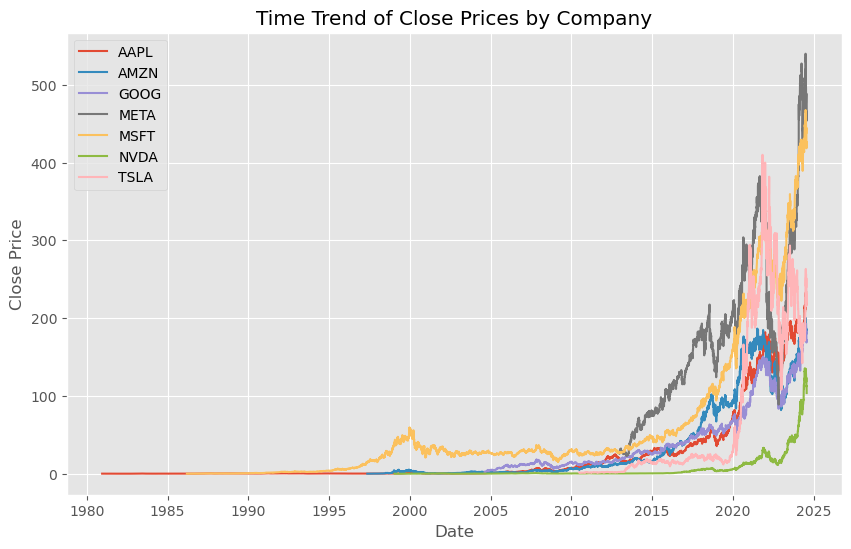

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the time trend
plt.figure(figsize=(10, 6))
for company in df['stock'].unique():
    company_data = df[df['stock'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.title('Time Trend of Close Prices by Company')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

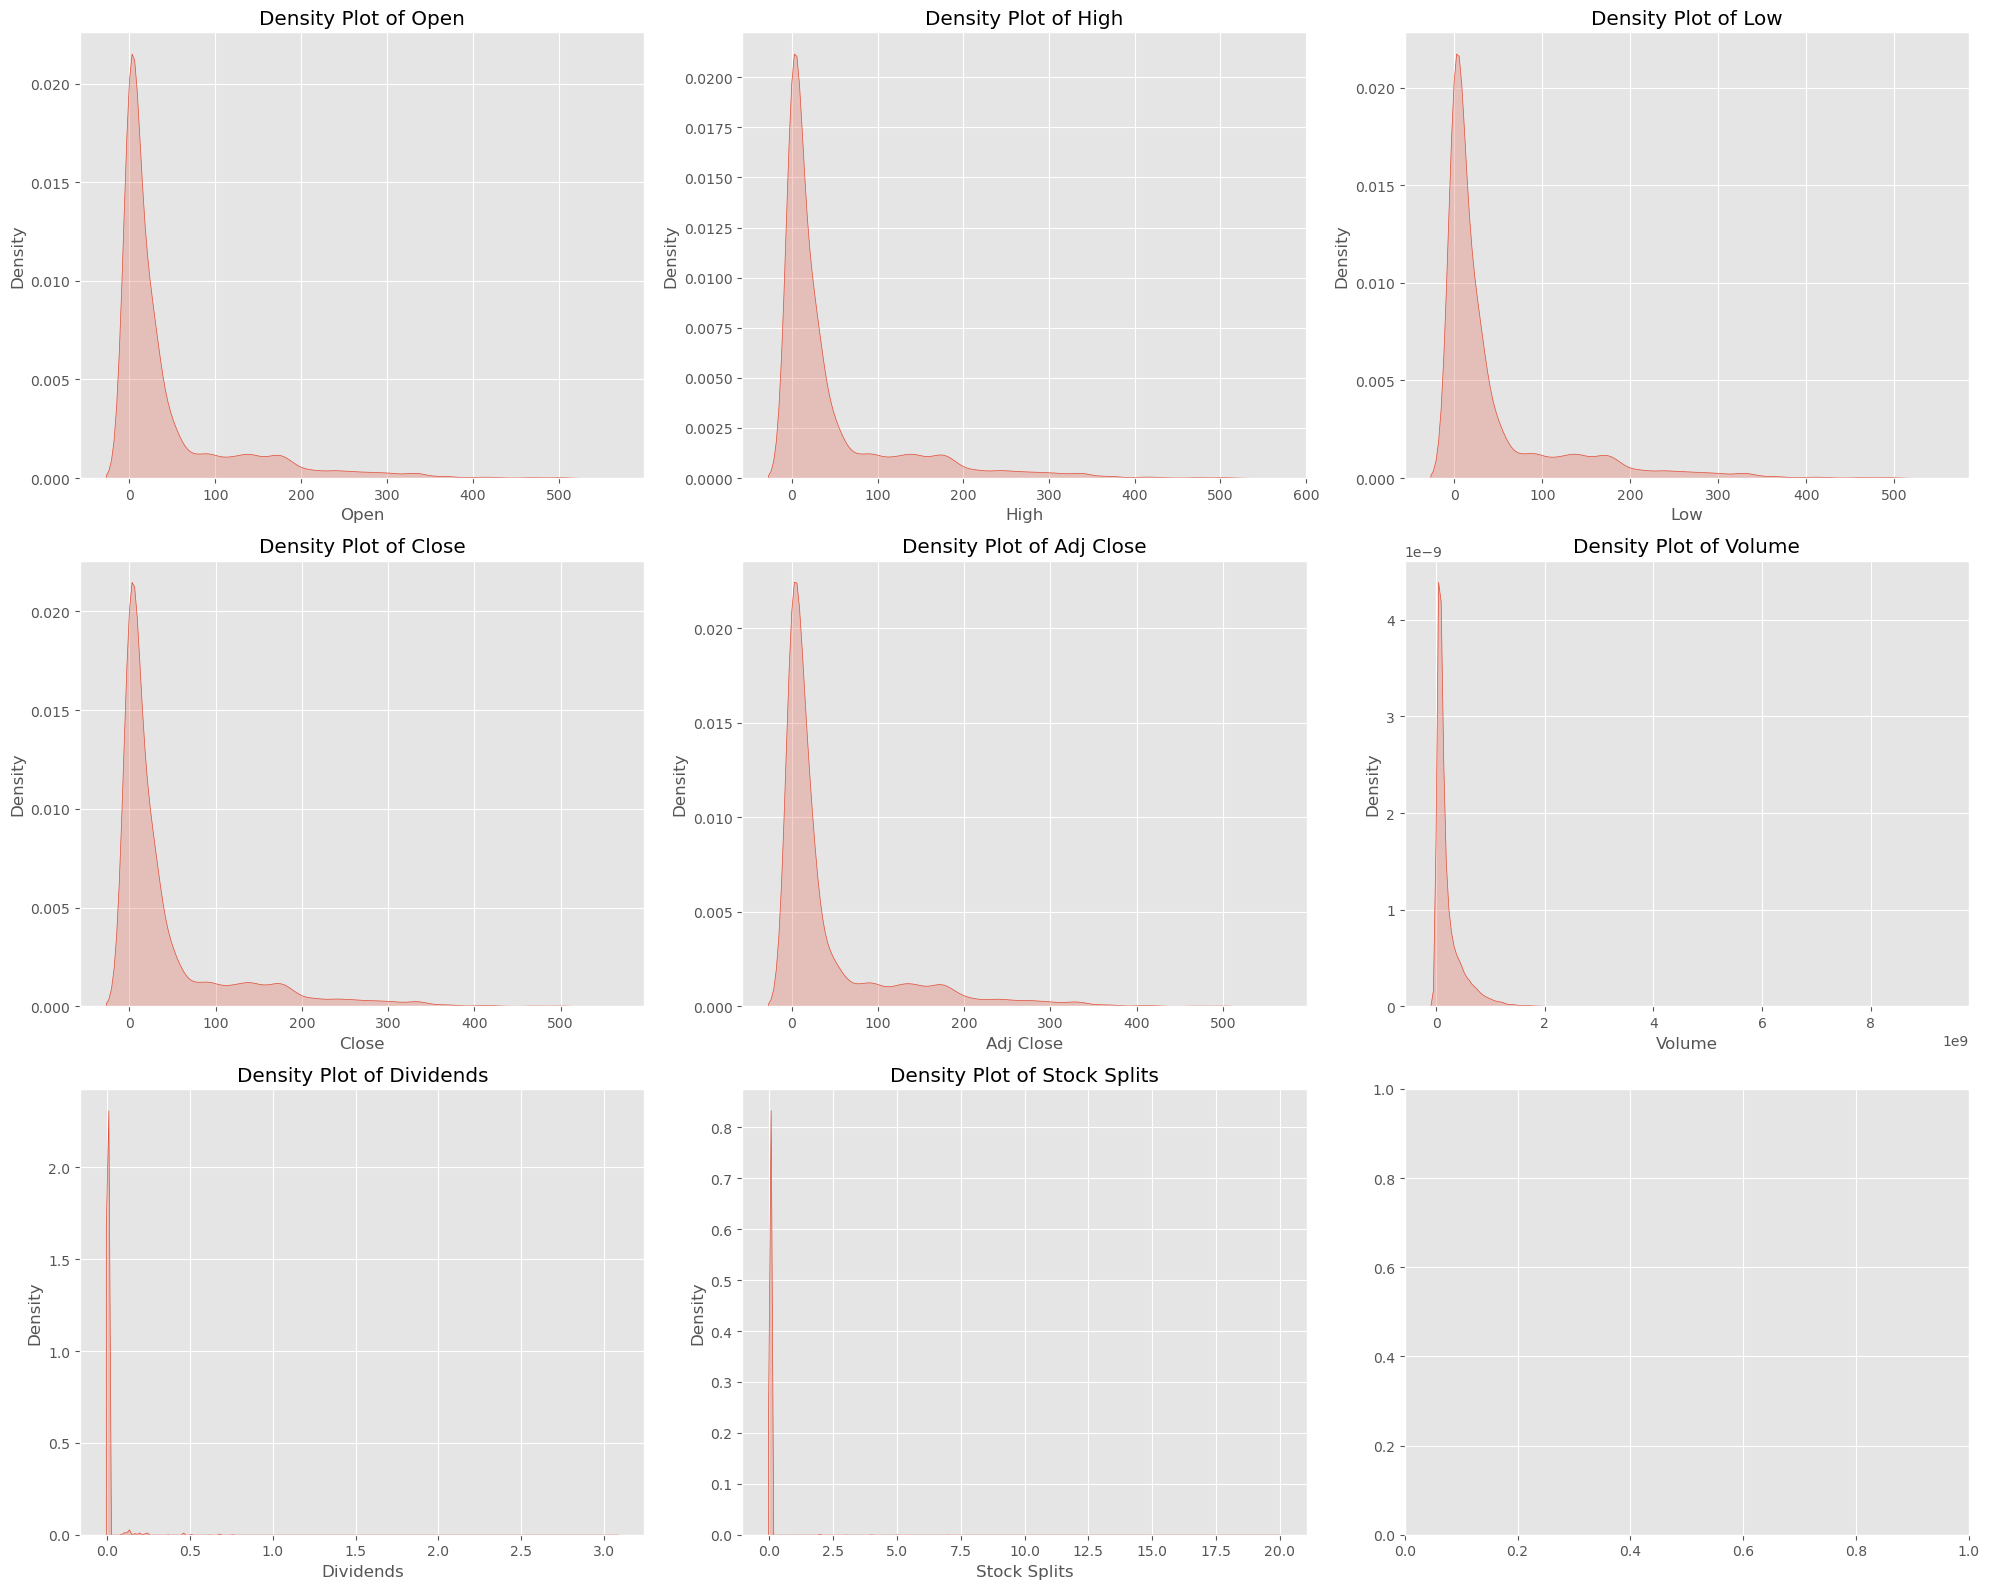

In [7]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Draw a KDE plot for each numerical column
for ax, col in zip(axes, numerical_cols):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'Density Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

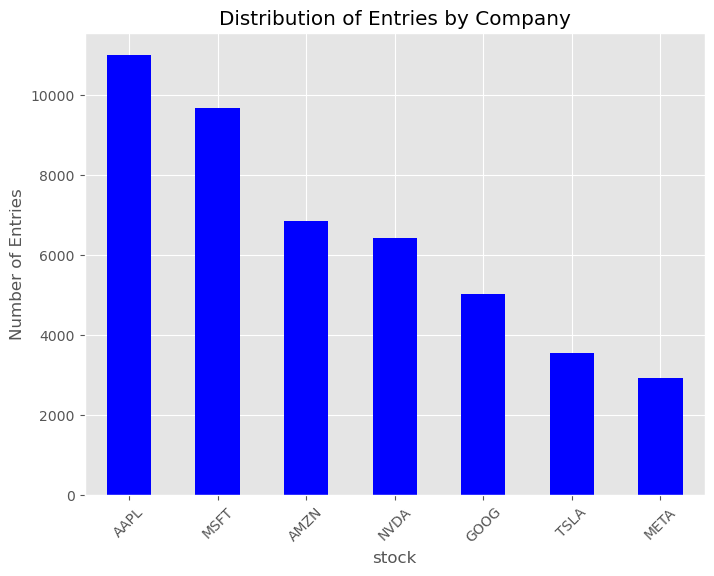

In [8]:
# Calculate the distribution of entries by company
company_distribution = df['stock'].value_counts()

# Plotting the distribution of entries by company
plt.figure(figsize=(8, 6))
company_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Entries by Company')
plt.xlabel('stock')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

In [9]:
df.shape

(45428, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          45428 non-null  datetime64[ns]
 1   Open          45428 non-null  float64       
 2   High          45428 non-null  float64       
 3   Low           45428 non-null  float64       
 4   Close         45428 non-null  float64       
 5   Adj Close     45428 non-null  float64       
 6   Volume        45428 non-null  int64         
 7   Dividends     45428 non-null  float64       
 8   Stock Splits  45428 non-null  float64       
 9   stock         45428 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 3.5+ MB


In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,45428,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000
mean,2009-04-26 08:53:21.549704960,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499
min,1980-12-12 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000
25%,2002-02-25 18:00:00,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000
50%,2011-06-20 12:00:00,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000
75%,2018-02-15 00:00:00,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000
max,2024-07-30 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000
std,NaN,78.259474,79.277620,77.218532,78.274673,78.049554,3.076645e+08,0.022527,0.155291


In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'stock'],
      dtype='object')

In [13]:
# Calculate a 20-period Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# Calculate the RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])

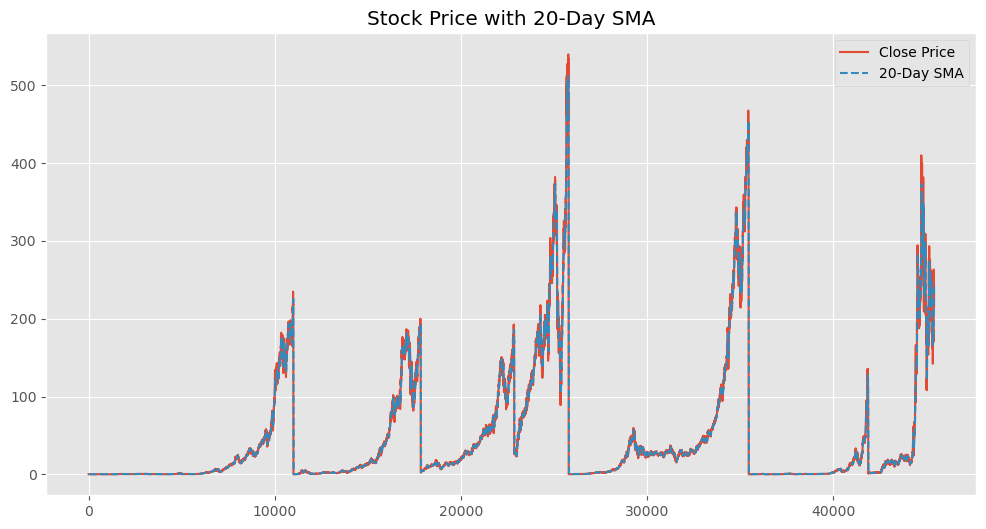

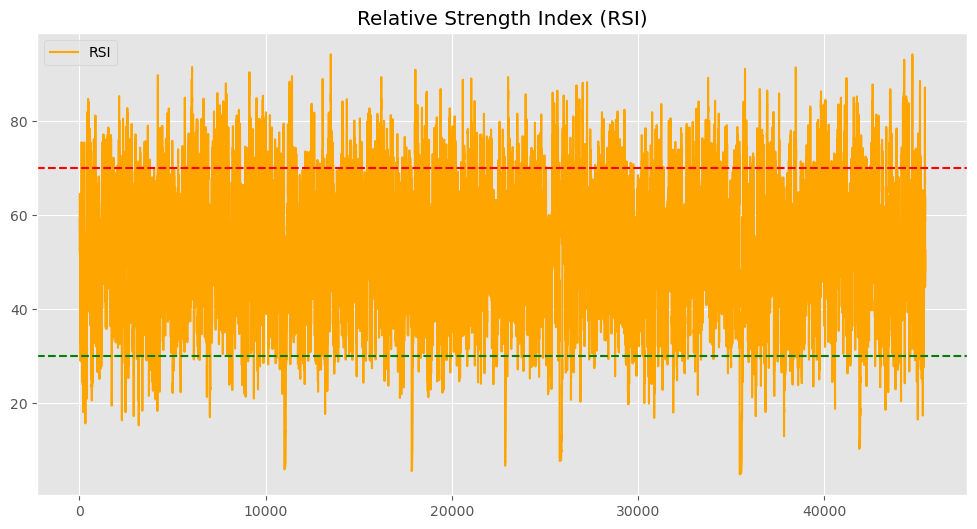

In [14]:
# Plot the Closing price along with the 20-period SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='20-Day SMA', linestyle='--')
plt.title('Stock Price with 20-Day SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.show()

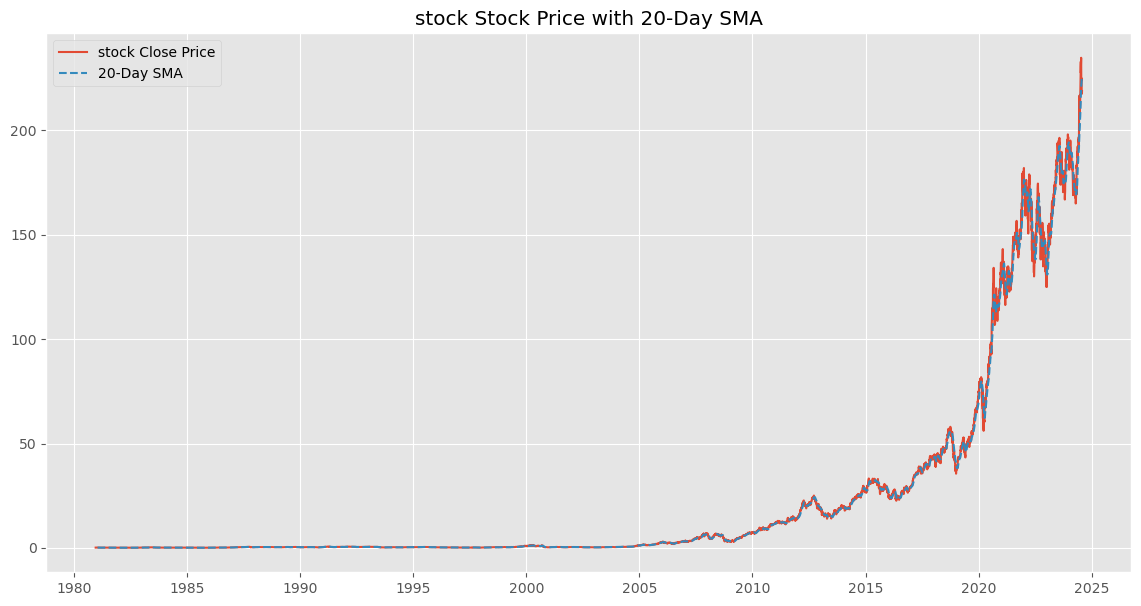

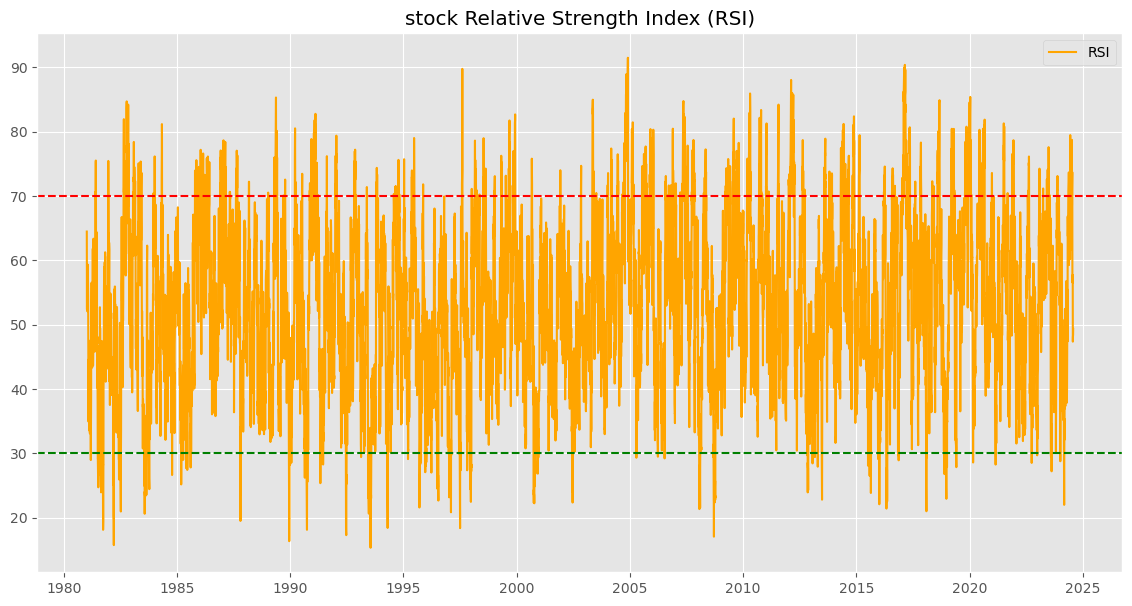

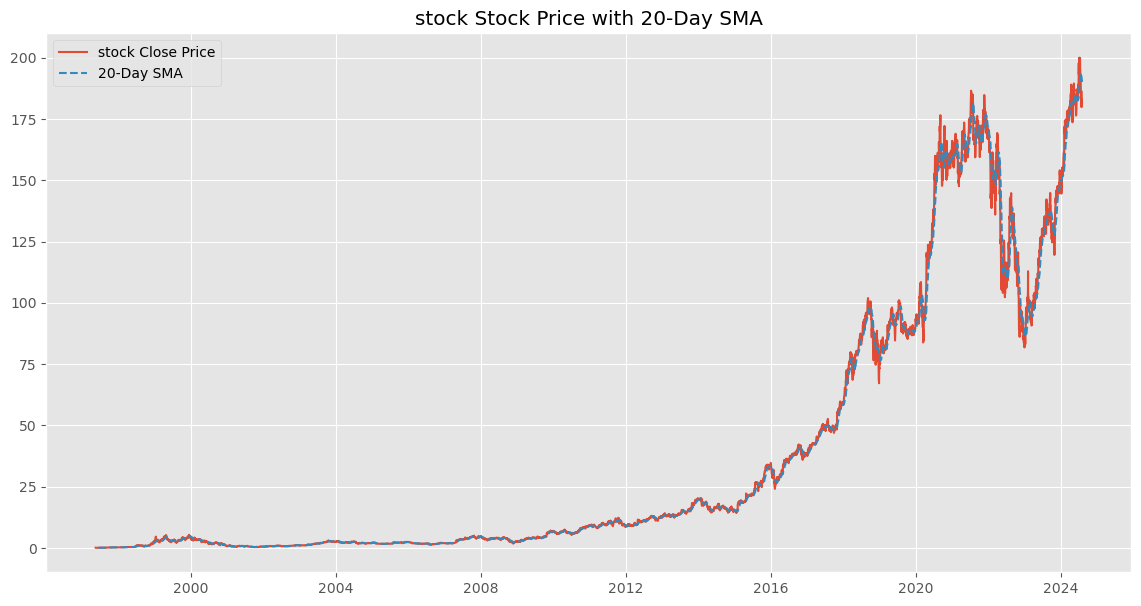

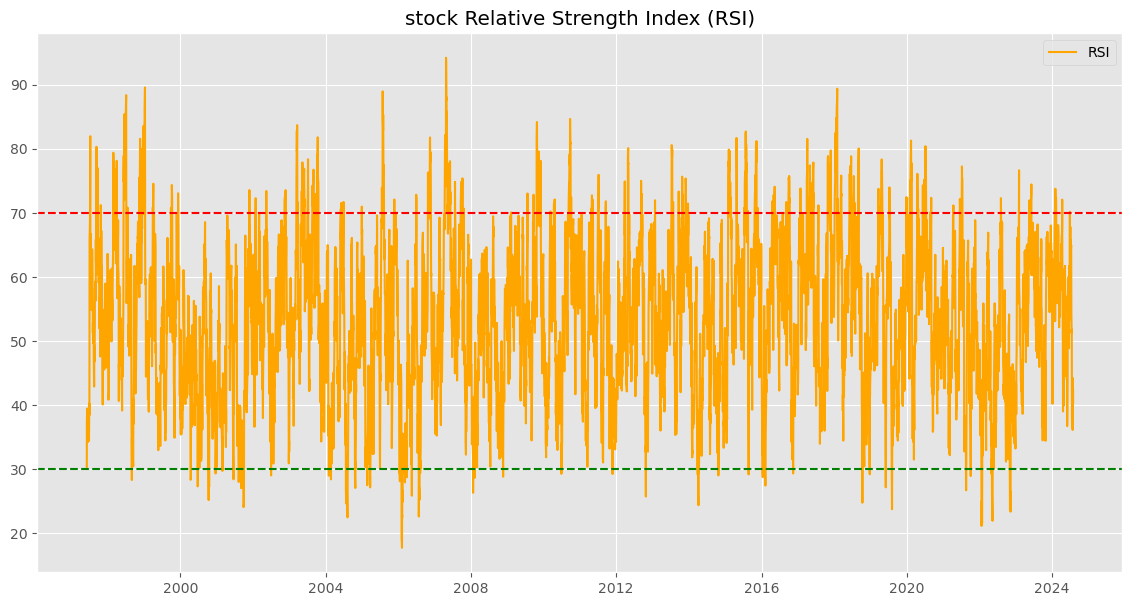

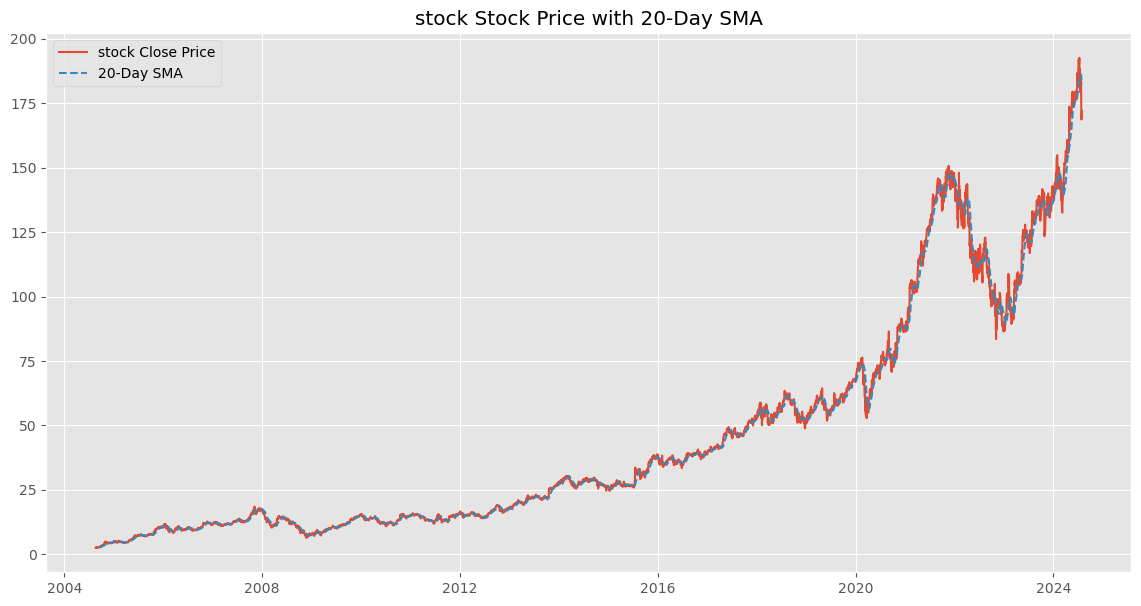

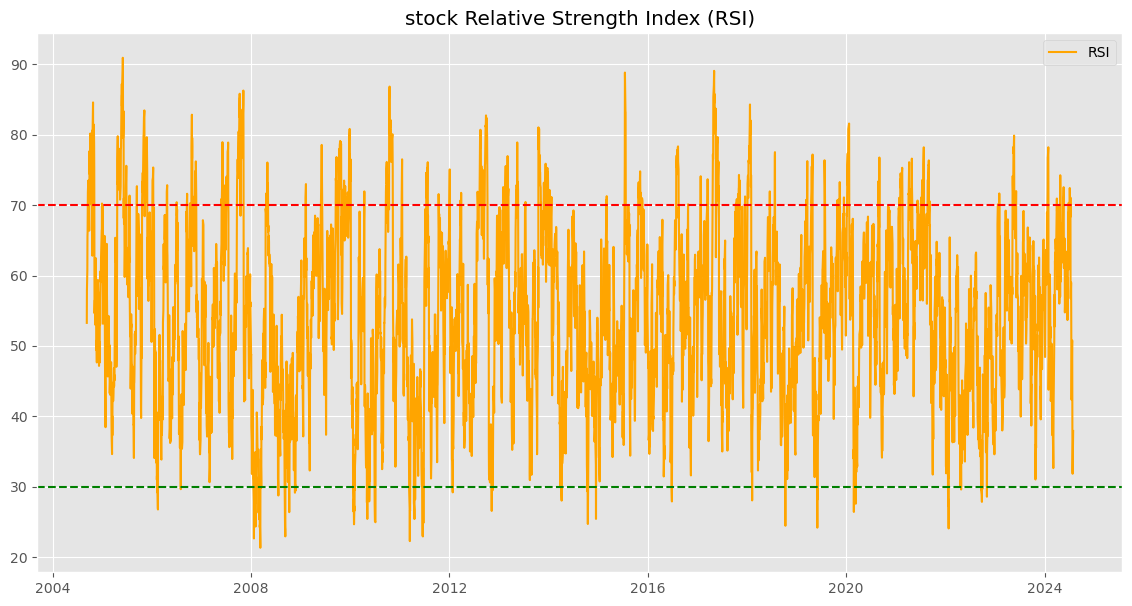

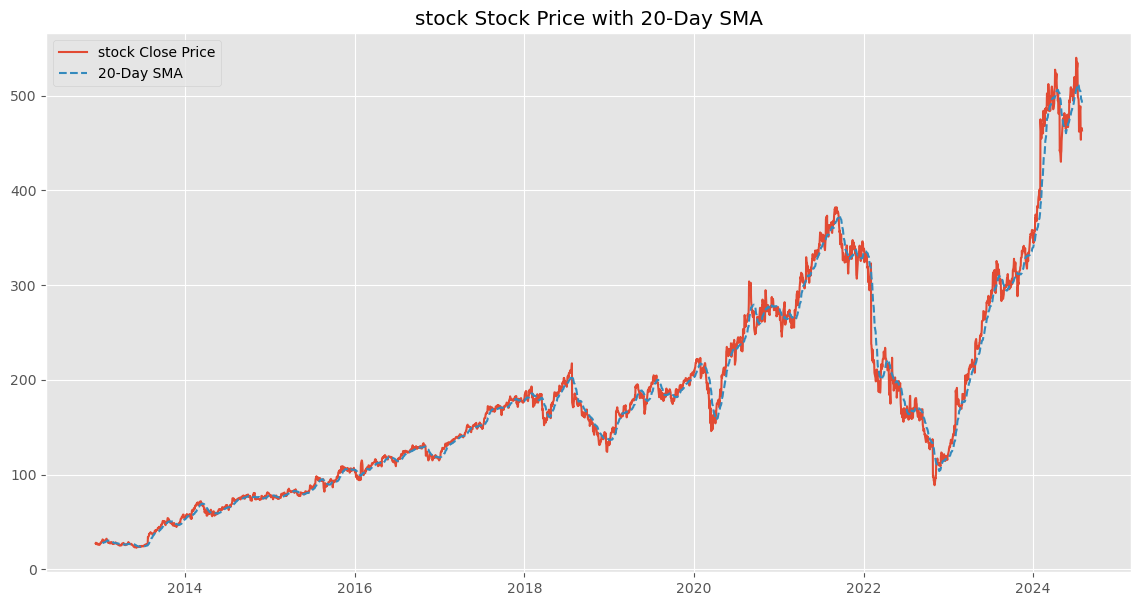

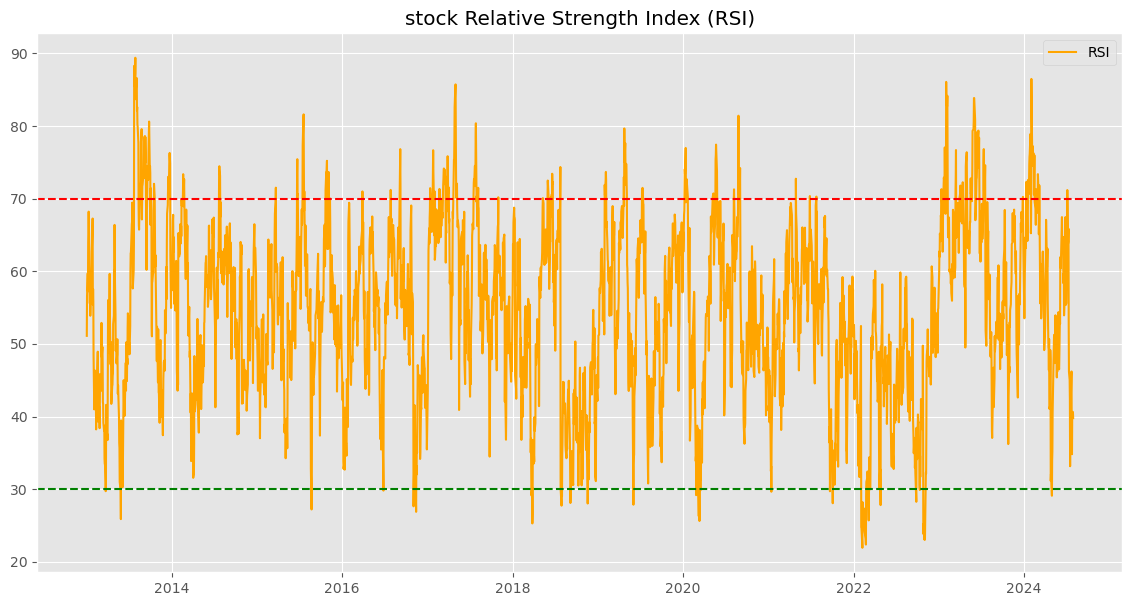

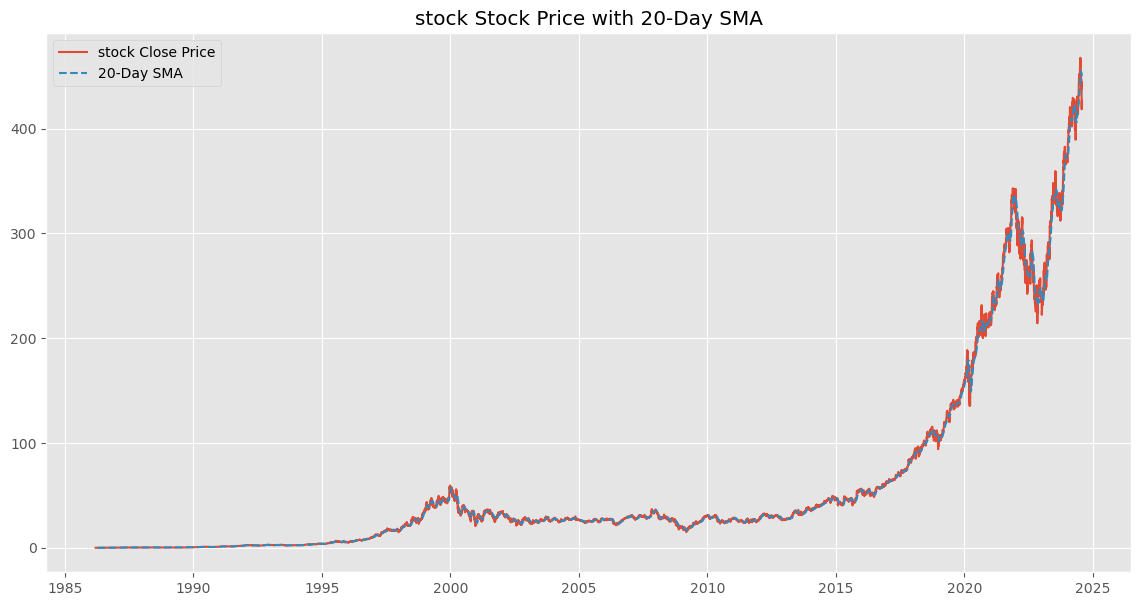

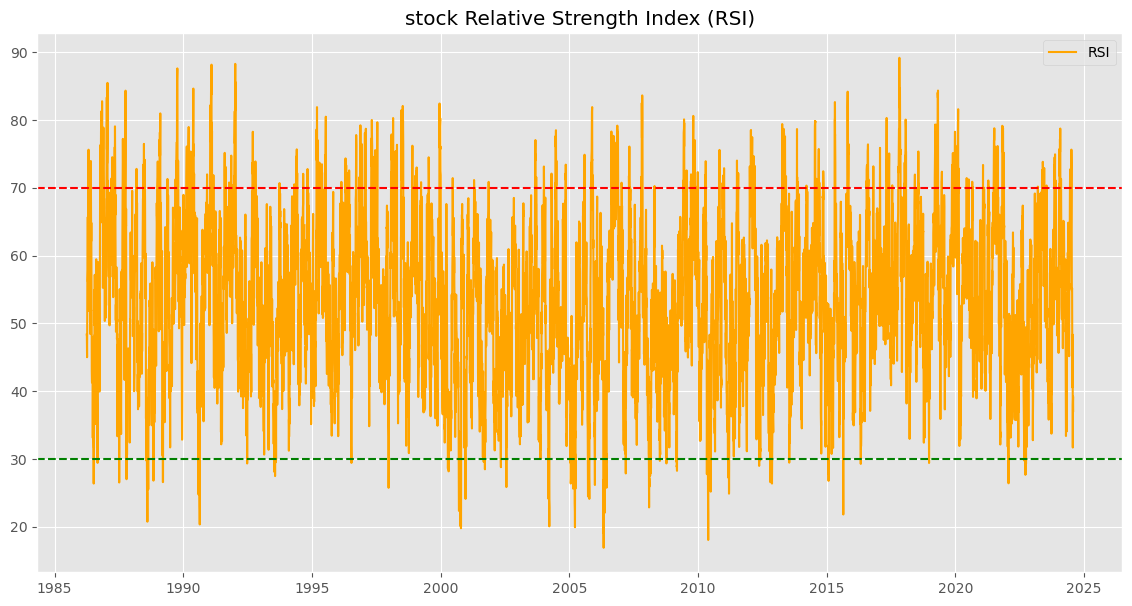

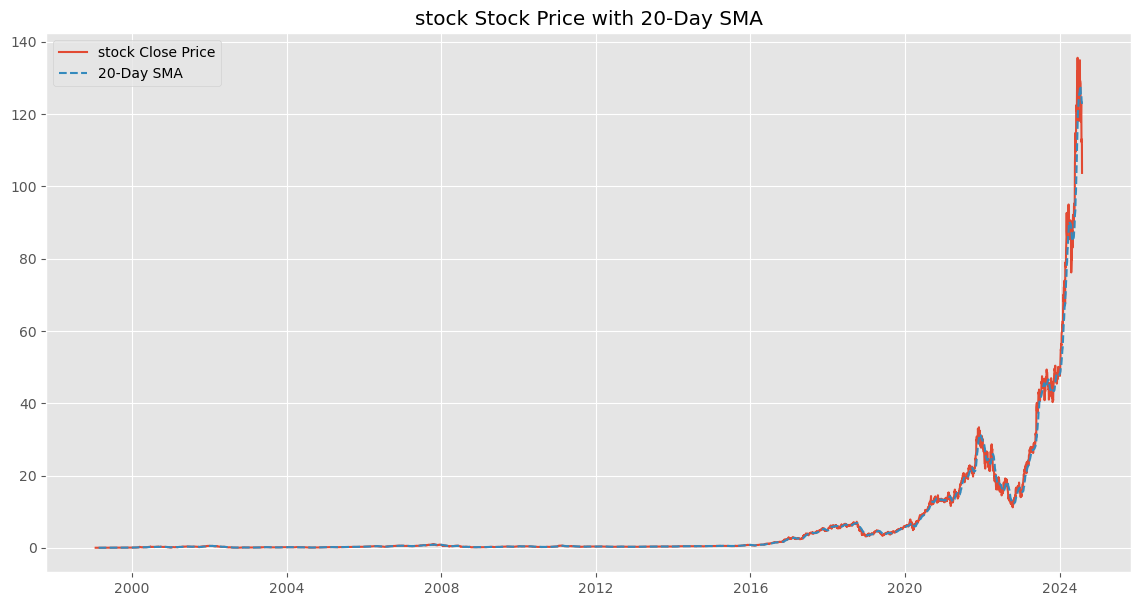

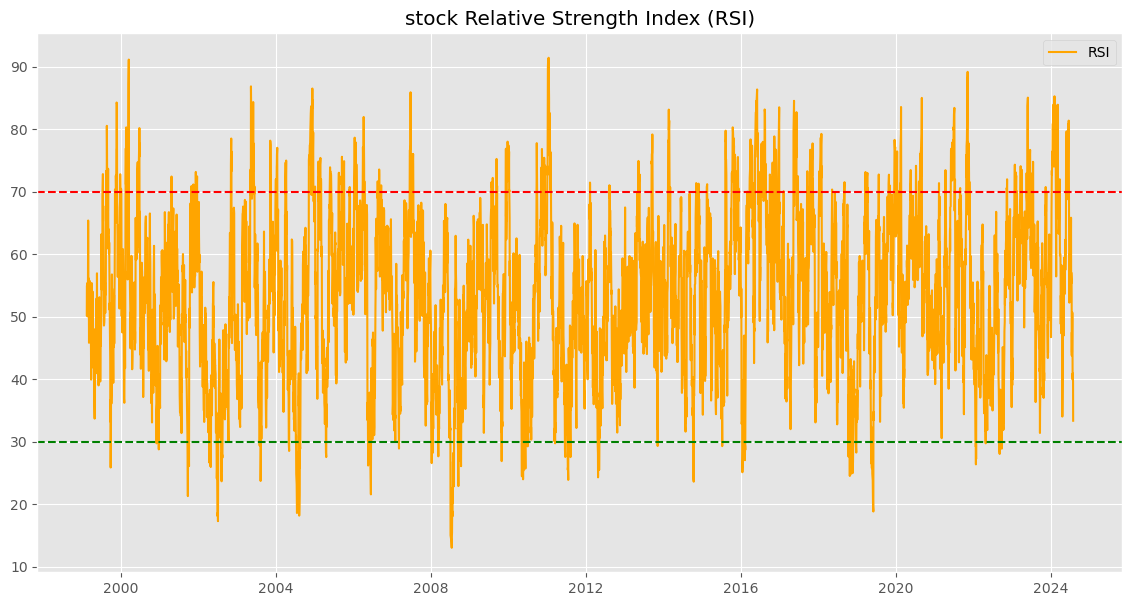

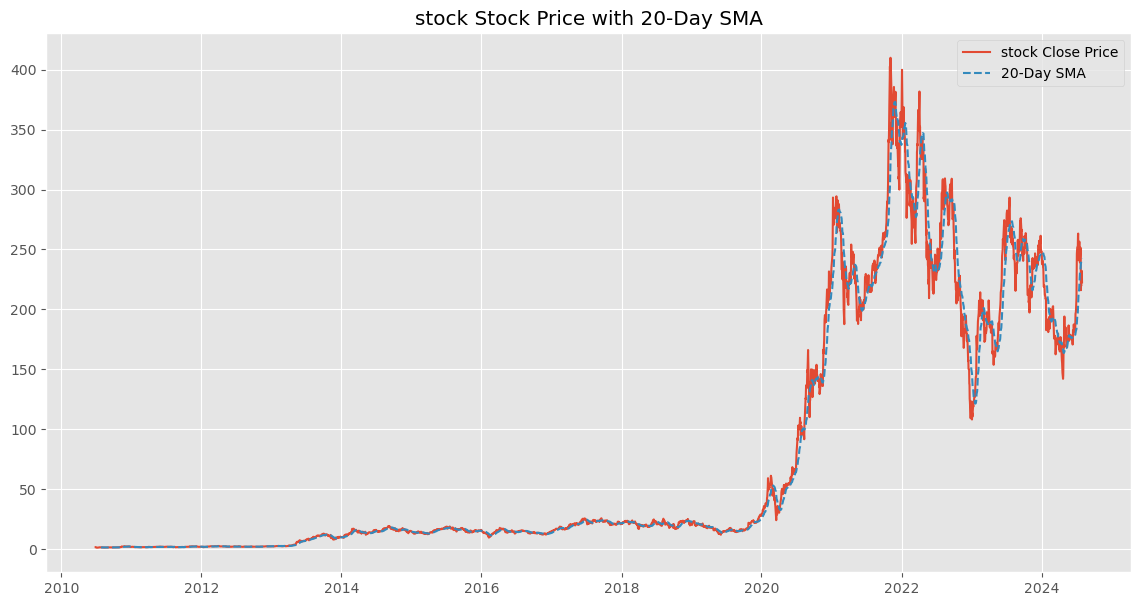

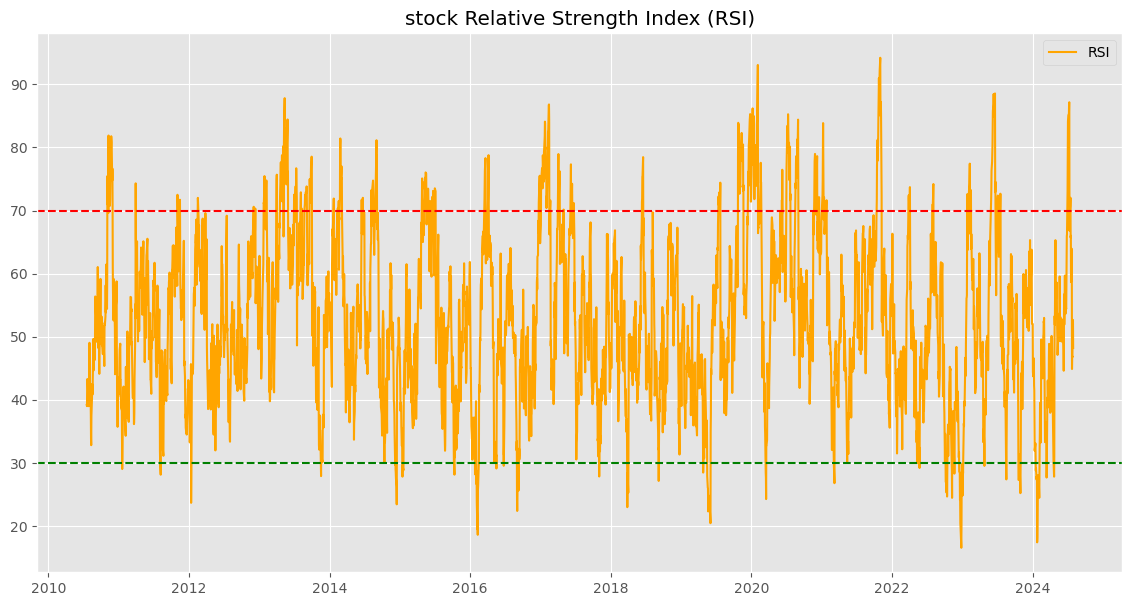

In [15]:
# Group data by the 'stock' column
grouped = df.groupby('stock')

# Create a dictionary to store the results for each company
company_results = {}

# Loop through each group (company)
for company, data in grouped:
    # Ensure the data is sorted by date
    data = data.sort_values(by='Date')
    
    # Calculate technical indicators using TA-Lib
    data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'])

    # Calculate Daily Returns
    data['daily_returns'] = data['Close'].pct_change()

    # Calculate Annualized Volatility
    data['volatility'] = data['daily_returns'].rolling(window=252).std() * np.sqrt(252)
    
    # Store the processed data for each company
    company_results["stock"] = data

    # Example visualization for each company
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label=f'{"stock"} Close Price')
    plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', linestyle='--')
    plt.title(f'{"stock"} Stock Price with 20-Day SMA')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['RSI'], label='RSI', color='orange')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'{"stock"} Relative Strength Index (RSI)')
    plt.legend()
    plt.show()


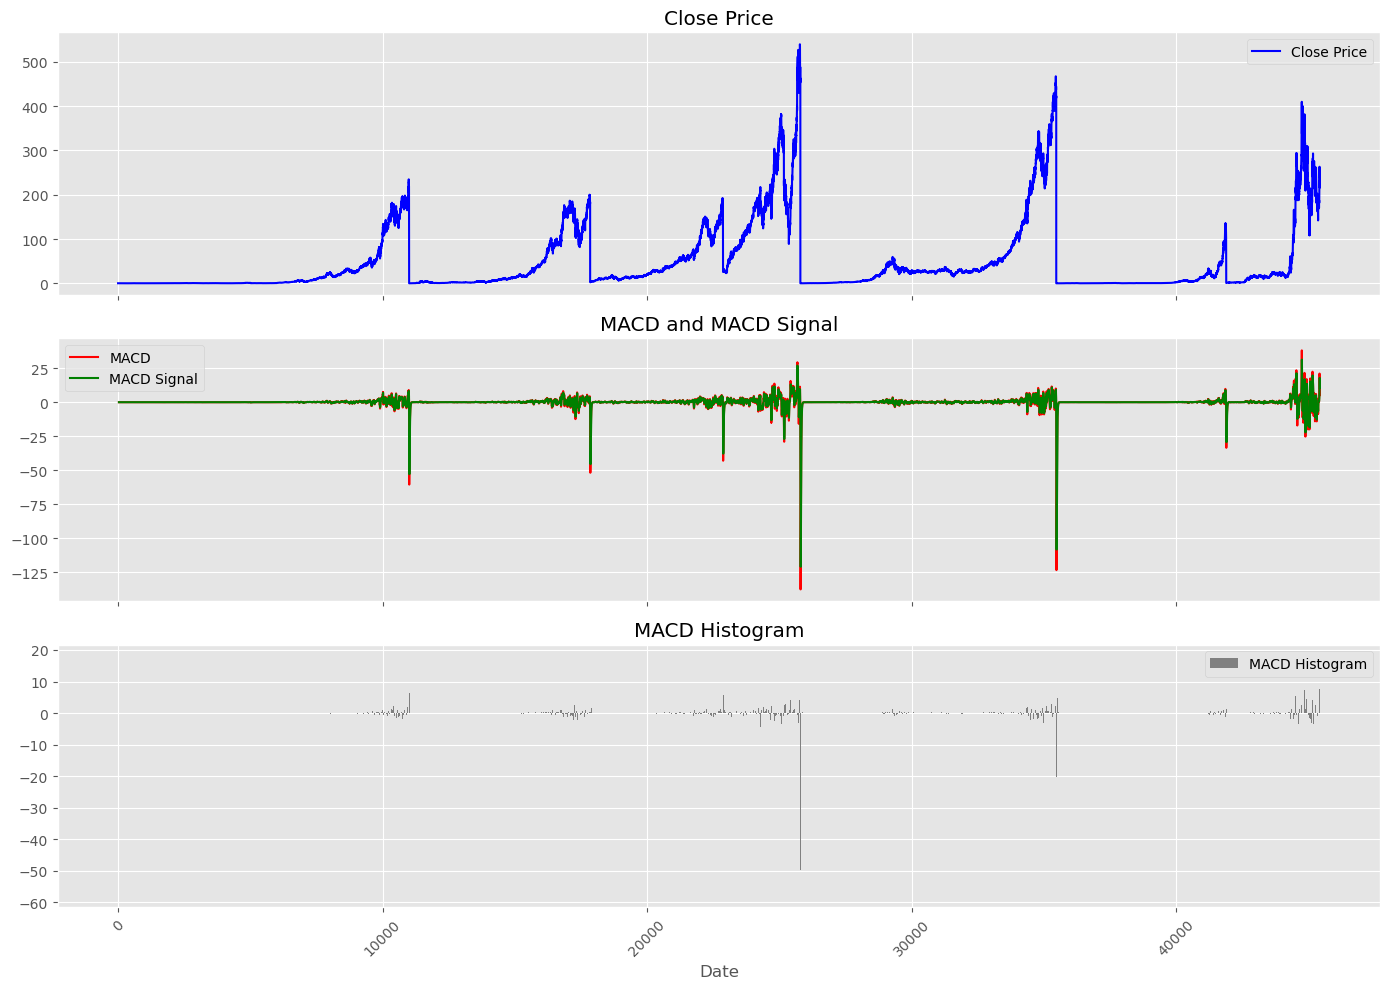

In [16]:
# Create a new figure with subplots
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot the Close price
ax[0].plot(df.index, df['Close'], label='Close Price', color='blue')
ax[0].set_title('Close Price')
ax[0].legend(loc='best')

# Plot MACD and MACD Signal
ax[1].plot(df.index, df['MACD'], label='MACD', color='red')
ax[1].plot(df.index, df['MACD_signal'], label='MACD Signal', color='green')
ax[1].set_title('MACD and MACD Signal')
ax[1].legend(loc='best')

# Plot MACD Histogram
ax[2].bar(df.index, df['MACD_hist'], color='gray', label='MACD Histogram')
ax[2].set_title('MACD Histogram')
ax[2].legend(loc='best')

# Formatting the x-axis
plt.xlabel('Date')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [17]:
df_stock = df.to_csv("financial stock data", index = False)